In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
## Load data
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
## target not included
dataset = pd.DataFrame(df.data, columns=df.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
dataset.shape

(20640, 8)

In [10]:
## Segregating dep. & independent features (data and target)
X = dataset
y = df.target

In [11]:
# y --> target array

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [15]:
### Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Transform the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
## scaler.inverse_transform(X_train) ---> returns the initial X_train itself

In [22]:
# Model Creation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) ## training model -> y = mx + c => learns m and c parameters

LinearRegression()

In [24]:
### Cross validate the model => statistical Technique to train & (validate) the model
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_scores))
#### The avg. mean value is less i.e

-0.5268253746355748


In [25]:
## Model Prediction
y_pred = model.predict(X_test)
y_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

/tmp/ipython-input-3595752830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: ylabel='Density'>

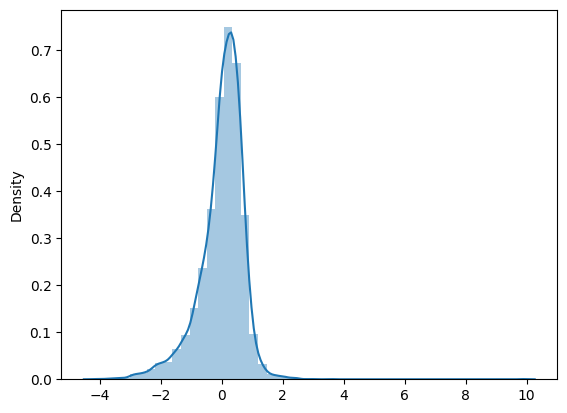

In [35]:
## distplot
import seaborn as sns
sns.distplot(y_pred-y_test)

## so most of the points as seen lies in [-2,2] , so the variance is very less

Text(0, 0.5, 'residuals')

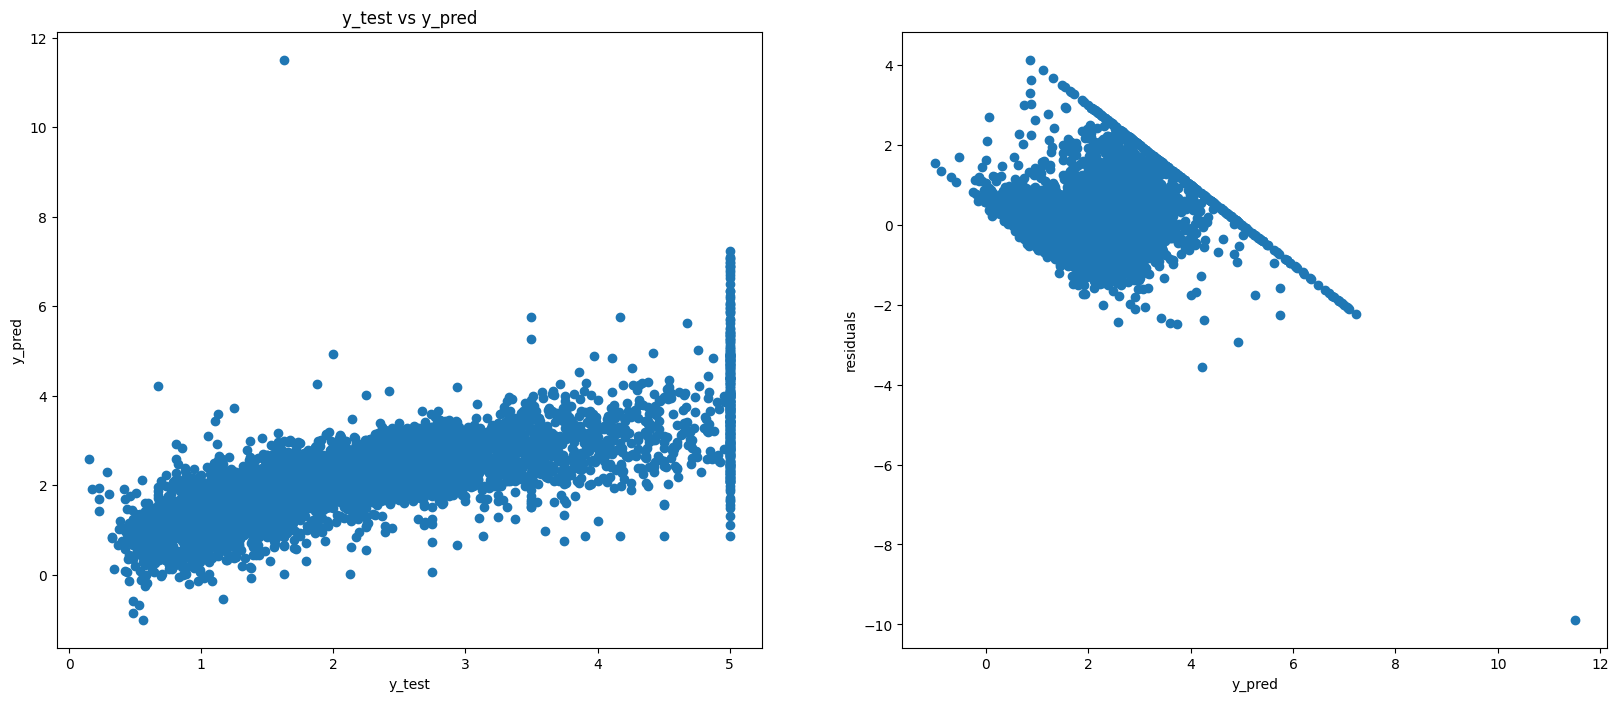

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,8)) # !! 2 represents 2 sub-plots and 1 represents 1 fig/frame of size (20,8).

# Plot1
ax[0].scatter(y_test, y_pred)
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('y_pred')
ax[0].set_title('y_test vs y_pred')

# Plot2
residuals = y_test - y_pred
ax[1].scatter(y_pred, residuals)
ax[1].set_xlabel('y_pred')
ax[1].set_ylabel('residuals')